In [ ]:
import pandas as pd

df = pd.read_csv("data/Social_Network_Ads.csv")

df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
171,15570932,Male,34,115000,0
399,15594041,Female,49,36000,1
212,15707596,Female,59,42000,0
280,15609669,Female,59,88000,1
259,15815236,Female,45,131000,1


In [2]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[["Age"]]
y = df["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [4]:
y_train_pred = model.predict(X_train)

y_train.values[:5], y_train_pred[:5]

(array([0, 1, 1, 0, 1]), array([0, 1, 0, 1, 1]))

In [5]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[189,  16],
       [ 41,  74]])

1. true positive (TP): model correctly predicts positive class
2. true negative (TN): model correctly predicts negative class
3. false positive (FP): model incorrectly predicts positive class (type I error)
4. false negative (FN): model incorrectly predicts negative class (type II error)

In [6]:
y_train.shape

(320,)

In [7]:
tp = y_train[(y_train == 1) & (y_train_pred == 1)].count()
tn = y_train[(y_train == 0) & (y_train_pred == 0)].count()
fp = y_train[(y_train == 0) & (y_train_pred == 1)].count()
fn = y_train[(y_train == 1) & (y_train_pred == 0)].count()

print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

True Positives: 74
True Negatives: 189
False Positives: 16
False Negatives: 41


In [8]:
y_test_pred = model.predict(X_test)

confusion_matrix(y_test, y_test_pred)

array([[50,  2],
       [ 5, 23]])

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       205
           1       0.82      0.64      0.72       115

    accuracy                           0.82       320
   macro avg       0.82      0.78      0.80       320
weighted avg       0.82      0.82      0.82       320



In [10]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.82
Recall: 0.64


In [11]:
example_pred = [0, 1, 1, 0, 1, 0, 1, 0, 0, 1]

example_true = [0, 1, 0, 0, 1, 0, 1, 1, 1, 1]

In [12]:
# 100% precision and 80% recall

p100_exmaple_pred = [0, 1, 1, 0, 0, 0, 1, 0, 0, 1]

p100_example_true = [0, 1, 1, 0, 1, 0, 1, 0, 0, 1]

In [13]:
# 100% recall and 80% precision

r100_example_pred = [0, 1, 1, 0, 1, 0, 1, 0, 0, 1]

r100_example_true = [0, 1, 1, 0, 0, 0, 1, 0, 0, 1]


In [14]:
print(classification_report(example_true, example_pred))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.80      0.67      0.73         6

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



In [15]:
4 / 6

0.6666666666666666

---

In [48]:
import numpy as np

example_pred_prob = np.arange(0, 1.0, 0.1)

example_true = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [71]:
import sklearn.metrics as metrics

threshold = 0.2

example_pred = [1 if prob >= threshold else 0 for prob in example_pred_prob]

print(f"true labels: {example_true}")
print(f"predicted probabilities: {example_pred_prob}")
print(f"predicted labels (threshold={threshold}): {example_pred}\n\n")
print(f" precision: {metrics.precision_score(example_true, example_pred)}")
print(f" recall: {metrics.recall_score(example_true, example_pred)}")

true labels: [0 0 0 0 0 1 1 1 1 1]
predicted probabilities: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
predicted labels (threshold=0.2): [0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


 precision: 0.625
 recall: 1.0


In [53]:
for i in np.arange(0, 1.0, 0.1):
    example_pred = [1 if prob >= i else 0 for prob in example_pred_prob]
    print(
        f"Threshold: {i:.1f} | Precision: {metrics.precision_score(example_true, example_pred):.2f} | Recall: {metrics.recall_score(example_true, example_pred):.2f}"
    )

Threshold: 0.0 | Precision: 0.50 | Recall: 1.00
Threshold: 0.1 | Precision: 0.56 | Recall: 1.00
Threshold: 0.2 | Precision: 0.62 | Recall: 1.00
Threshold: 0.3 | Precision: 0.71 | Recall: 1.00
Threshold: 0.4 | Precision: 0.83 | Recall: 1.00
Threshold: 0.5 | Precision: 1.00 | Recall: 1.00
Threshold: 0.6 | Precision: 1.00 | Recall: 0.80
Threshold: 0.7 | Precision: 1.00 | Recall: 0.60
Threshold: 0.8 | Precision: 1.00 | Recall: 0.40
Threshold: 0.9 | Precision: 1.00 | Recall: 0.20


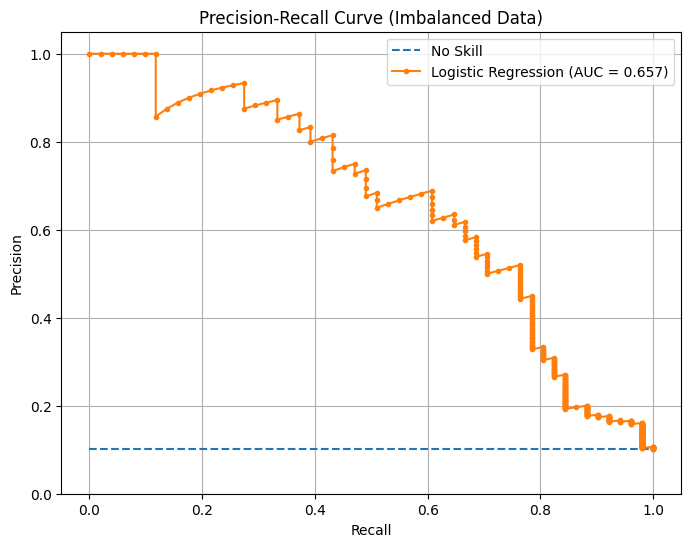

In [69]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc

# 1. Generate a synthetic imbalanced dataset
# 1000 samples, 10% positive class (weights=[0.9, 0.1])
X, y = make_classification(
    n_features=5,
    n_samples=1000,
    n_classes=2,
    weights=[0.9, 0.1],
    random_state=42,
    n_informative=2,
)

# 2. Split into train and test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# 3. Fit a model (Logistic Regression)
model = LogisticRegression()
model.fit(trainX, trainy)

# 4. Predict probabilities
# keep probabilities for the positive outcome only
lr_probs = model.predict_proba(testX)
lr_probs = lr_probs[:, 1]
# rng = np.random.default_rng()

# lr_probs = rng.random(
#     size=testy.shape[0]
# )  # Simulate random probabilities for demonstration

# 5. Calculate Precision and Recall
precision, recall, _ = precision_recall_curve(testy, lr_probs)

# 6. Calculate AUC
lr_auc = auc(recall, precision)

# 7. Plot the curve
plt.figure(figsize=(8, 6))

# Plot the "No Skill" baseline
# For PR curves, the baseline is the percentage of positive samples
no_skill = len(testy[testy == 1]) / len(testy)
plt.plot([0, 1], [no_skill, no_skill], linestyle="--", label="No Skill")

# Plot the model curve
plt.plot(
    recall, precision, marker=".", label=f"Logistic Regression (AUC = {lr_auc:.3f})"
)

# Labels and Title
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Imbalanced Data)")
plt.legend()
plt.grid(True)
plt.ylim([0.0, 1.05])

plt.show()

In [66]:
lr_auc

0.12188500368860507